In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
df = pd.read_csv("US_Heart_Patients.csv")

In [261]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [262]:
df.dtypes

Gender              object
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BP Meds            float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
tot cholesterol    float64
Systolic BP        float64
Diastolic BP       float64
BMI                float64
heartRate          float64
glucose            float64
Heart-Att            int64
dtype: object

In [263]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [264]:
df.nunique()

Gender                3
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BP Meds               2
prevalentStroke       2
prevalentHyp          2
diabetes              2
tot cholesterol     248
Systolic BP         234
Diastolic BP        146
BMI                1363
heartRate            72
glucose             143
Heart-Att             2
dtype: int64

In [265]:
num_feature =[]
cat_feature = []
target_feature = "Heart-Att"

In [266]:
for col in df.columns:
    if df[col].nunique()>4:
        num_feature.append(col)
    else:
        cat_feature.append(col)
cat_feature.remove("Heart-Att")



In [267]:
num_feature

['age',
 'cigsPerDay',
 'tot cholesterol',
 'Systolic BP',
 'Diastolic BP',
 'BMI',
 'heartRate',
 'glucose']

In [268]:
cat_feature

['Gender',
 'education',
 'currentSmoker',
 'BP Meds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

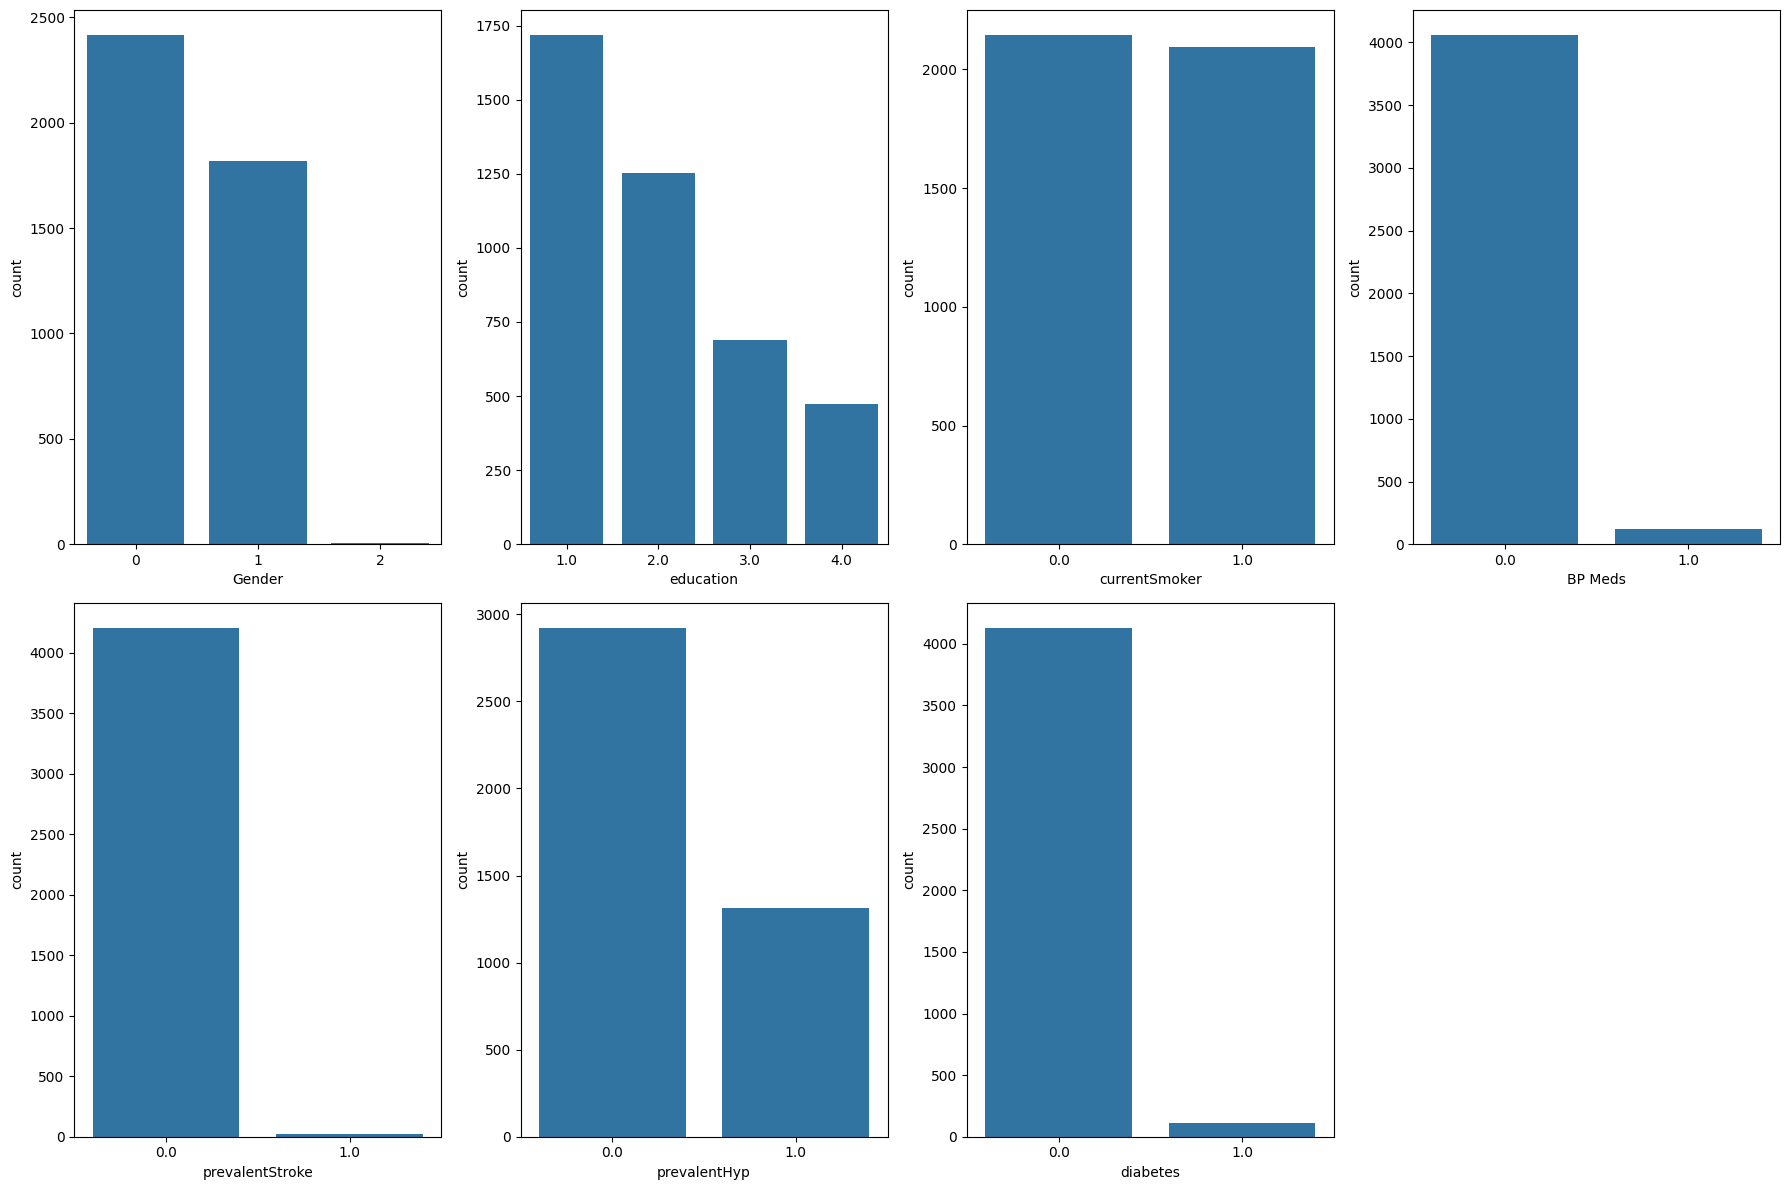

In [269]:
plt.figure(figsize=(18,12))
for i in range(len(cat_feature)):
    plt.subplot(2,4,i+1)
    sns.countplot(data=df,x=cat_feature[i])
    plt.tight_layout()

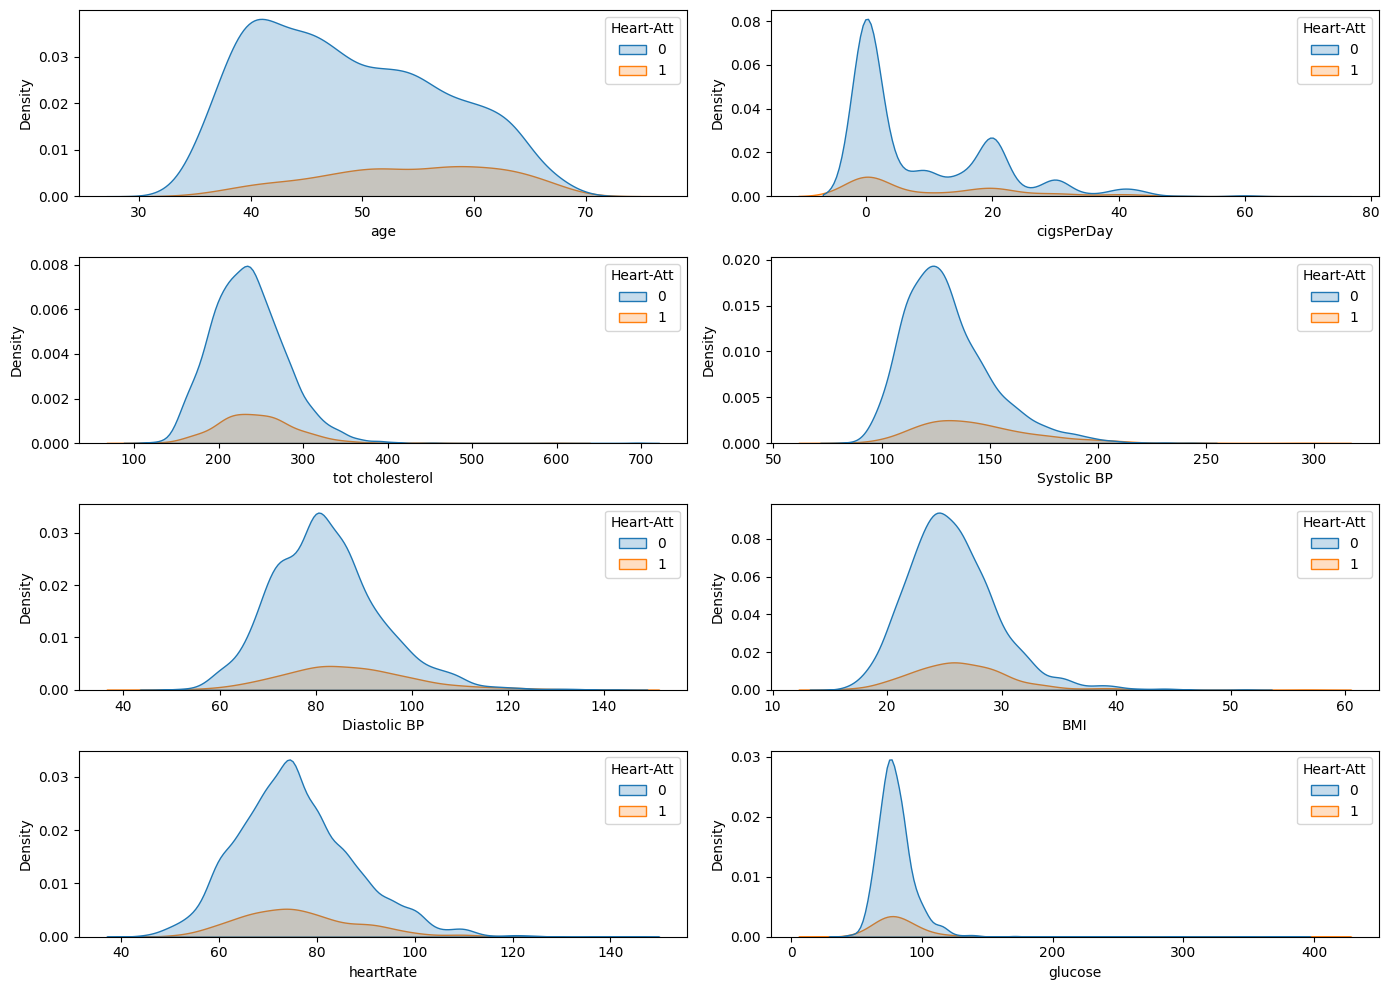

In [270]:
plt.figure(figsize=(14,10))
for i in range(len(num_feature)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data = df, x=num_feature[i],fill=True,hue=target_feature)
    plt.tight_layout()

In [271]:
df[num_feature].skew()

age                0.228980
cigsPerDay         1.247912
tot cholesterol    0.873634
Systolic BP        1.144616
Diastolic BP       0.712693
BMI                0.982522
heartRate          0.630295
glucose            6.217639
dtype: float64

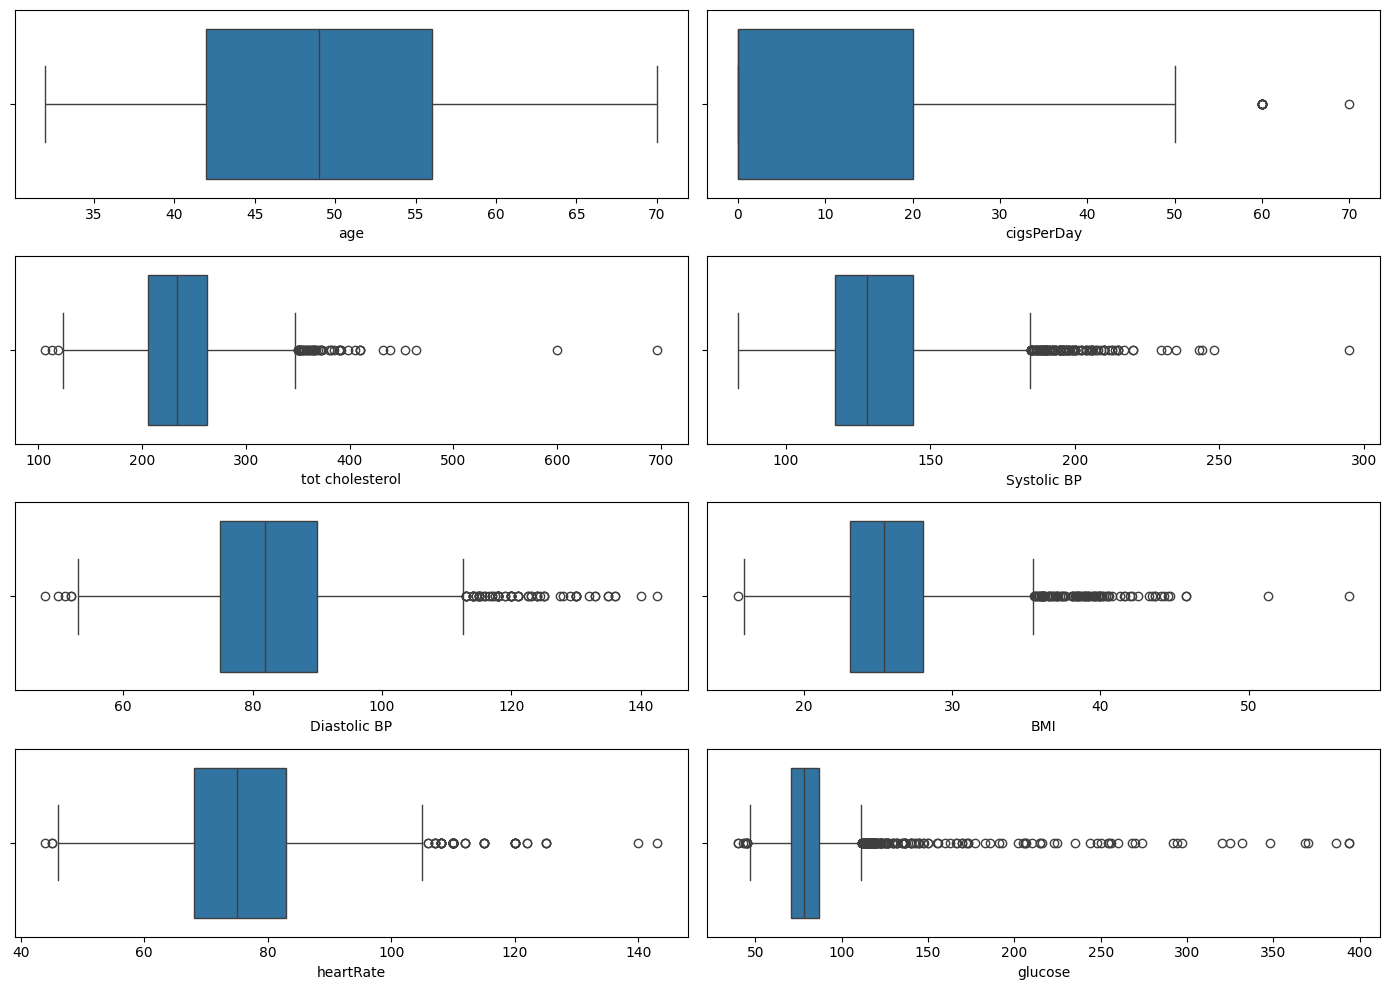

In [272]:
plt.figure(figsize=(14,10))
for i in range(len(num_feature)):
    plt.subplot(4,2,i+1)
    sns.boxplot(data = df, x=num_feature[i],fill=True)
    plt.tight_layout()

<Axes: >

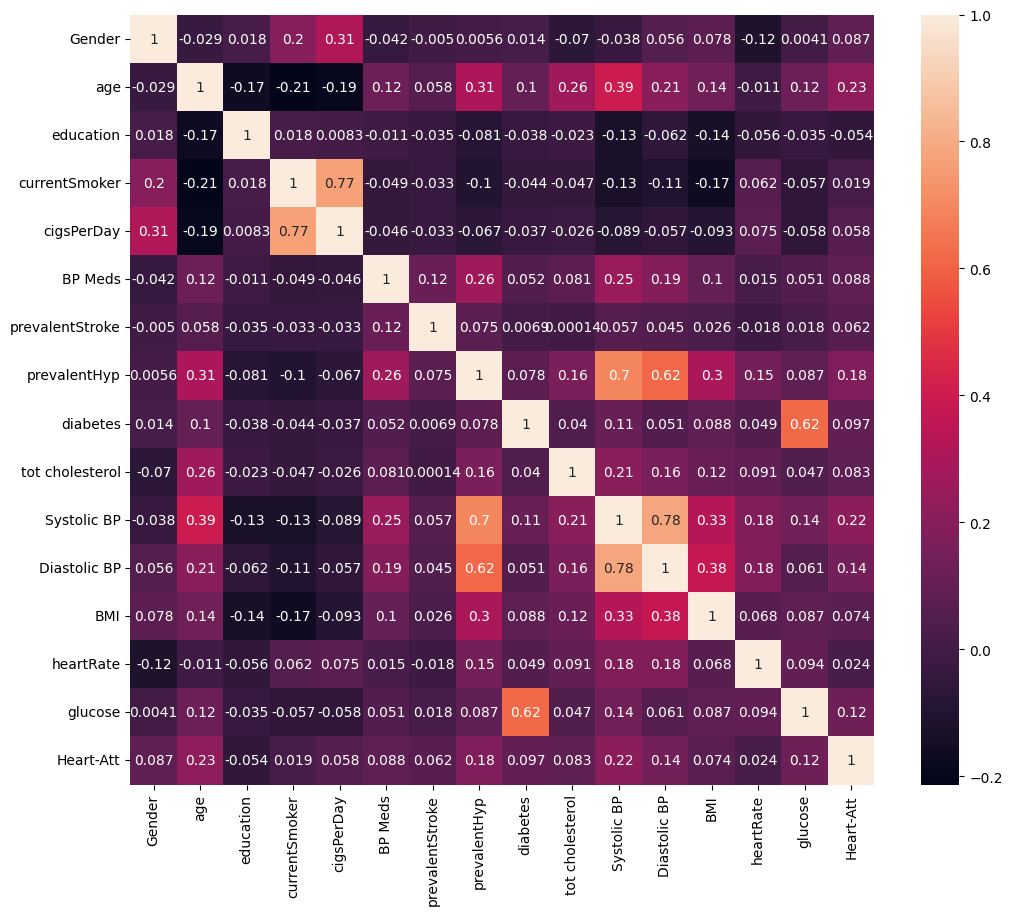

In [273]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

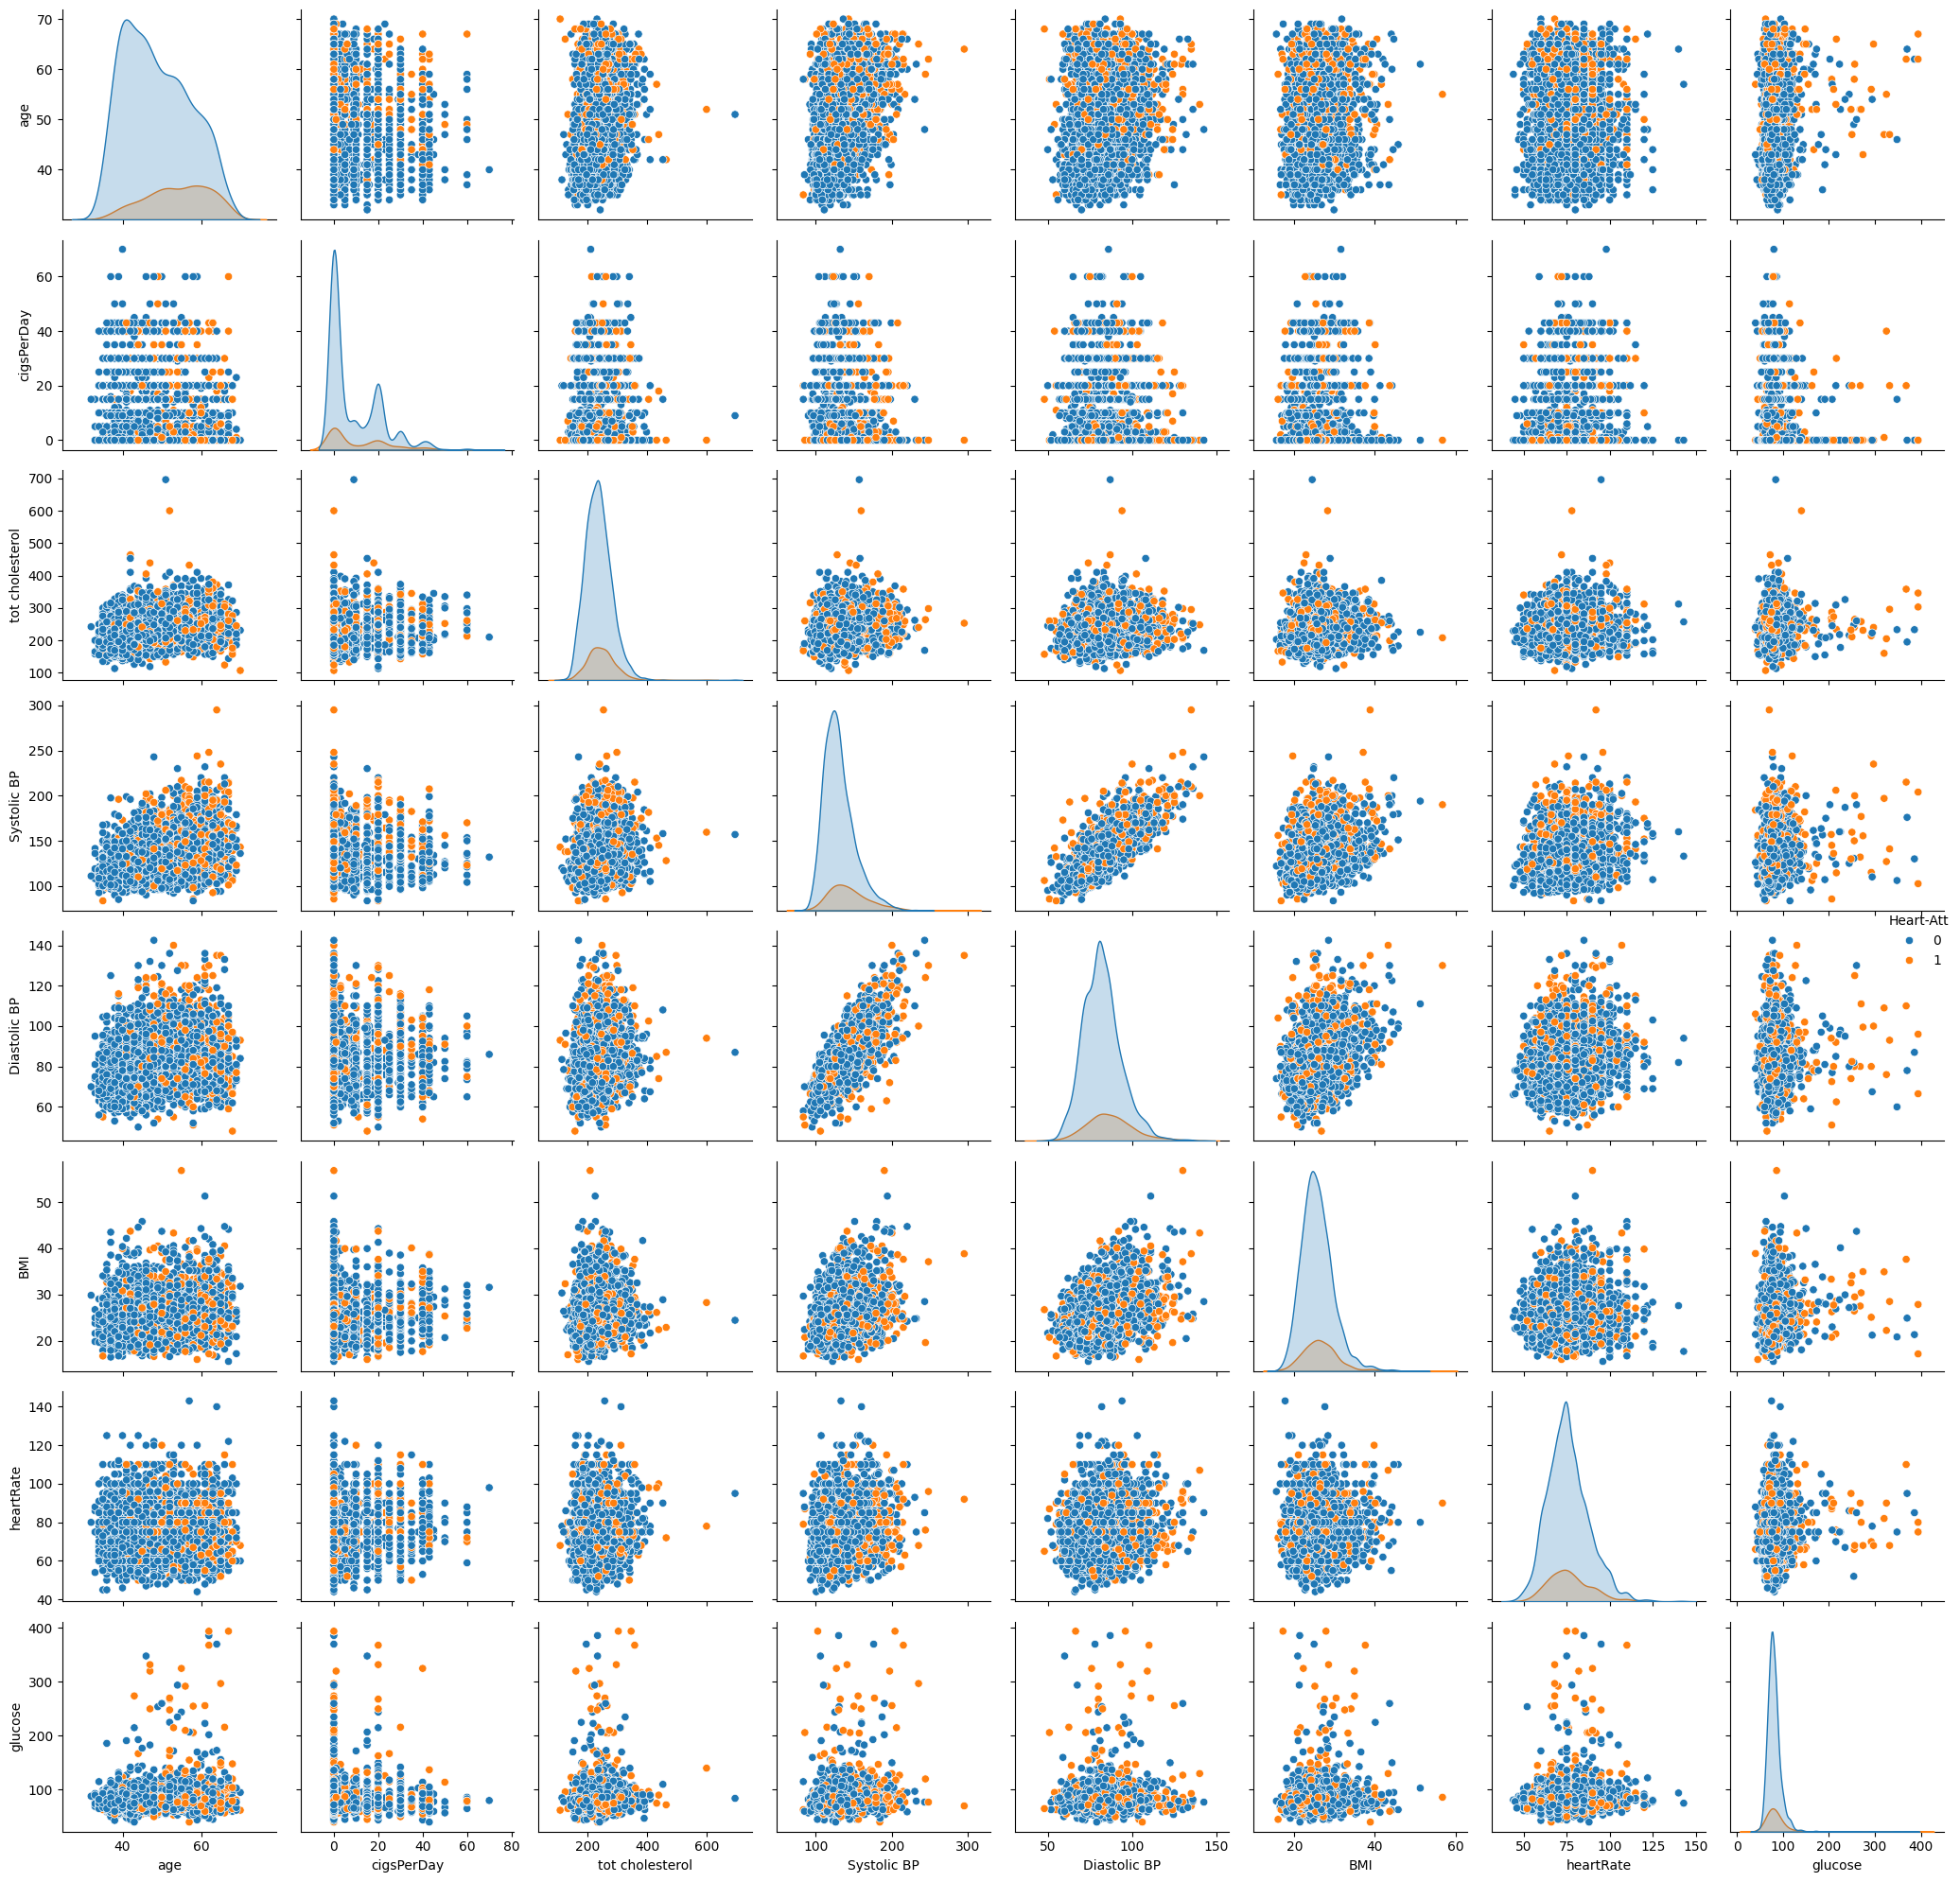

In [274]:
sns.pairplot(data=df[num_feature+[target_feature]],hue=target_feature)
plt.tight_layout()

In [275]:
df.isnull().sum()

Gender               0
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [276]:
outlier_feature = [col for col in num_feature if col != "age"]


In [277]:
outlier_feature

['cigsPerDay',
 'tot cholesterol',
 'Systolic BP',
 'Diastolic BP',
 'BMI',
 'heartRate',
 'glucose']

In [278]:
num_feature = ['age']

In [279]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [280]:
num_pipeline = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoder",OneHotEncoder(handle_unknown="ignore"))
])

outlier_pipeline = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='median')),
    ("power",PowerTransformer(method='yeo-johnson')),
    ("scaler",StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num",num_pipeline,num_feature),
    ("cat",cat_pipeline,cat_feature),
    ("outlier",outlier_pipeline,outlier_feature)
])

In [281]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [282]:
X = df.drop("Heart-Att",axis=1)
y = df['Heart-Att']

In [283]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [284]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [285]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [286]:
LR.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [287]:
LR_pred = LR.predict(X_test)

In [288]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,LR_pred)
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[1070    7]
 [ 182   13]]


In [289]:
print(metrics.classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1077
           1       0.65      0.07      0.12       195

    accuracy                           0.85      1272
   macro avg       0.75      0.53      0.52      1272
weighted avg       0.82      0.85      0.80      1272



In [290]:
from xgboost import XGBClassifier
xgb = XGBClassifier( n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    gamma=1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train),
    eval_metric="logloss",
    random_state=42)

In [291]:
xgb.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [292]:
xgb_pred = xgb.predict(X_test)

In [293]:
print("Confusion Matrix \n",metrics.confusion_matrix(y_test,xgb_pred))

Confusion Matrix 
 [[923 154]
 [134  61]]


In [294]:
print(metrics.classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1077
           1       0.28      0.31      0.30       195

    accuracy                           0.77      1272
   macro avg       0.58      0.58      0.58      1272
weighted avg       0.78      0.77      0.78      1272



In [295]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)


In [296]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

xgb.fit(X_train_res, y_train_res)
xgb_pred = xgb.predict(X_test)

In [297]:
print(metrics.classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1077
           1       0.22      0.47      0.30       195

    accuracy                           0.67      1272
   macro avg       0.55      0.59      0.54      1272
weighted avg       0.78      0.67      0.71      1272



In [298]:
probs = xgb.predict_proba(X_test)[:, 1]
y_pred_custom = (probs >= 0.345).astype(int)
print(metrics.classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69      1077
           1       0.20      0.61      0.30       195

    accuracy                           0.57      1272
   macro avg       0.54      0.58      0.49      1272
weighted avg       0.78      0.57      0.63      1272



In [299]:
cm = metrics.confusion_matrix(y_test,y_pred_custom)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[604 473]
 [ 77 118]]


In [300]:
import pickle

pickle.dump(xgb,open("model.pkl","wb"))
pickle.dump(preprocessor,open("preprocessor.pkl","wb"))

In [301]:
new_data = pd.DataFrame([{
    "Gender" : 0,
    "age": 55,
    "cigsPerDay": 10,
    "tot cholesterol": 240,
    "Systolic BP": 130,
    "Diastolic BP": 85,
    "BMI": 26.5,
    "heartRate": 65,
    "glucose": 90,
    "currentSmoker": 1,
    "education": 2,
    "BP Meds": 0,
    "prevalentStroke": 0,
    "prevalentHyp": 1,
    "diabetes": 0
}])

In [302]:
model = pickle.load(open("model.pkl",'rb'))
preprocessor = pickle.load(open("preprocessor.pkl","rb"))

processed = preprocessor.transform(new_data)
pred = model.predict(processed)

if pred==[1]:
    print("Yes There is chance of Heart Attack")
else:
    print("NO There is NO chance of Heart Attack")

Yes There is chance of Heart Attack
